In [21]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt

In [14]:
def MF2D(image, threshold):
    height = image.shape[0]
    width = image.shape[1]
    
    f = 0.0
    u = 0.0
    chi = 0.0
    
    for y in np.arange(height-1):
        p10 = image[y, 0]
        p11 = image[y+1, 0]
        for x in range(width-1):
            pattern = 0
            
            p00 = p10
            p01 = p11
            p10 = image[y, x+1]
            p11 = image[y+1, x+1]
            
            if p00 > threshold:
                pattern = pattern | 1
            if p10 > threshold:
                pattern = pattern | 2
            if p11 > threshold:
                pattern = pattern | 4
            if p01 > threshold:
                pattern = pattern | 8
                
            # a1 = (p00 - threshold) / (p00 - p10)
            # a2 = (p10 - threshold) / (p10 - p11)
            # a3 = (p01 - threshold) / (p01 - p11)
            # a4 = (p00 - threshold) / (p00 - p01)
            
            if pattern == 0:
                pass
            elif pattern == 1:
                a1 = (p00 - threshold) / (p00 - p10)
                a4 = (p00 - threshold) / (p00 - p01)
                f += 0.5 * a1 * a4
                u += sqrt(a1*a1 + a4*a4)
                chi += 0.25
            elif pattern == 2:
                a1 = (p00 - threshold) / (p00 - p10)
                a2 = (p10 - threshold) / (p10 - p11)
                f += 0.5 * (1.0-a1)*a2
                u += sqrt((1.0-a1)*(1.0-a1) + a2*a2)
                chi += 0.25
            elif pattern == 3:
                a2 = (p10 - threshold) / (p10 - p11)
                a4 = (p00 - threshold) / (p00 - p01)
                f += a2 + 0.5*(a4-a2)
                u += sqrt(1.0 + (a4-a2)*(a4-a2))
            elif pattern == 4:
                a2 = (p10 - threshold) / (p10 - p11)
                a3 = (p01 - threshold) / (p01 - p11)
                f += 0.5 * (1.0-a2)*(1.0-a3)
                u += sqrt((1.0-a2)*(1.0-a2) + (1.0-a3)*(1.0-a3))
                chi += 0.25
            elif pattern == 5:
                a1 = (p00 - threshold) / (p00 - p10)
                a2 = (p10 - threshold) / (p10 - p11)
                a3 = (p01 - threshold) / (p01 - p11)
                a4 = (p00 - threshold) / (p00 - p01)
                f += 1.0 - 0.5*(1.0-a1)*a2 - 0.5*a3*(1.0-a4)
                u += sqrt((1.0-a1)*(1.0-a1) + a2*a2) + sqrt(a3*a3 + (1.0-a4)*(1.0-a4))
                chi += 0.5
            elif pattern == 6:
                a1 = (p00 - threshold) / (p00 - p10)
                a3 = (p01 - threshold) / (p01 - p11)
                f += (1.0-a3) + 0.5*(a3-a1)
                u += sqrt(1.0 + (a3-a1)*(a3-a1))
            elif pattern == 7:
                a3 = (p01 - threshold) / (p01 - p11)
                a4 = (p00 - threshold) / (p00 - p01)
                f += 1.0 - 0.5*a3*(1.0-a4)
                u += sqrt(a3*a3 + (1.0-a4)*(1.0-a4))
                chi += -0.25
            elif pattern == 8:
                a3 = (p01 - threshold) / (p01 - p11)
                a4 = (p00 - threshold) / (p00 - p01)
                f += 0.5*a3*(1.0-a4)
                u += sqrt(a3*a3 + (1.0-a4)*(1.0-a4))
                chi += 0.25
            elif pattern == 9:
                a1 = (p00 - threshold) / (p00 - p10)
                a3 = (p01 - threshold) / (p01 - p11)
                f += a1 + 0.5*(a3-a1)
                u += sqrt(1.0 + (a3-a1)*(a3-a1))
            elif pattern == 10:
                a1 = (p00 - threshold) / (p00 - p10)
                a2 = (p10 - threshold) / (p10 - p11)
                a3 = (p01 - threshold) / (p01 - p11)
                a4 = (p00 - threshold) / (p00 - p01)
                f += 1.0 - 0.5*a1*a4 + 0.5*(1.0-a2)*(1.0-a3)
                u += sqrt(a1*a1 + a4*a4) + sqrt((1.0-a2)*(1.0-a2) + (1.0-a3)*(1.0-a3))
                chi += 0.5
            elif pattern == 11:
                a2 = (p10 - threshold) / (p10 - p11)
                a3 = (p01 - threshold) / (p01 - p11)
                f += 1.0 - 0.5*(1.0-a2)*(1.0-a3)
                u += sqrt((1.0-a2)*(1.0-a2) + (1.0-a3)*(1.0-a3))
                chi += -0.25
            elif pattern == 12:
                a2 = (p10 - threshold) / (p10 - p11)
                a4 = (p00 - threshold) / (p00 - p01)
                f += (1.0-a2) + 0.5*(a2-a4)
                u += sqrt(1.0 + (a2-a4)*(a2-a4))
            elif pattern == 13:
                a1 = (p00 - threshold) / (p00 - p10)
                a2 = (p10 - threshold) / (p10 - p11)
                f += 1.0 - 0.5*(1.0-a1)*a2
                u += sqrt((1.0-a1)*(1.0-a1) + a2*a2)
                chi += -0.25
            elif pattern == 14:
                a1 = (p00 - threshold) / (p00 - p10)
                a4 = (p00 - threshold) / (p00 - p01)
                f += 1.0 - 0.5*a1*a4
                u += sqrt(a1*a1 + a4*a4)
                chi += -0.25
            elif pattern == 15:
                f += 1.0
    return (f, u, chi)

In [17]:
img = np.random.randn(256, 256)

In [18]:
MF2D(img, 0.1)

(31571.00690770213, 52883.00190763454, 5268.0)

In [19]:
threshold = np.linspace(-3, 3, 50)

In [23]:
v0s = []
v1s = []
v2s = []
for nu in threshold:
    v0, v1, v2 = MF2D(img, nu)
    v0s.append(v0)
    v1s.append(v1)
    v2s.append(v2)

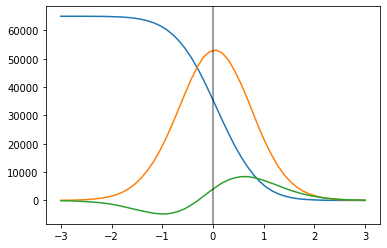

In [28]:
fig, ax = plt.subplots(1, 1)
ax.plot(threshold, v0s)
ax.plot(threshold, v1s)
ax.plot(threshold, v2s)
ax.axvline(x=0, color='k', alpha=0.5)